#Import Library yang diperlukan

In [34]:
# 📥 Data Loading
import pandas as pd      # Membaca dan mengelola data (DataFrame)
import numpy as np       # Operasi numerik dan array

# 📊 EDA (Exploratory Data Analysis)
import seaborn as sns    # Visualisasi statistik
import matplotlib.pyplot as plt  # Visualisasi umum
from wordcloud import WordCloud  # Visualisasi word cloud
import warnings
warnings.filterwarnings("ignore")  # Menyembunyikan warning agar output bersih

# ⚙️ Preparation
from scipy.sparse import csr_matrix  # Konversi data ke sparse matrix (efisien untuk CF)

# 🤖 Modeling
from sklearn.neighbors import NearestNeighbors     # Collaborative Filtering (KNN)
from sklearn.feature_extraction.text import TfidfVectorizer  # Content-Based Filtering (TF-IDF)
from sklearn.metrics.pairwise import cosine_similarity, sigmoid_kernel  # Pengukuran kemiripan antar item

#Load Dataset yang akan dianalisis

In [35]:
##Dataset anime
anime = pd.read_csv('anime.csv')  
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [36]:
## Dataset Rating Anime
rating = pd.read_csv('rating.csv')  
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


📥 Membaca Dataset

Pada tahap ini, dataset dibaca menggunakan fungsi read_csv dari pustaka Pandas. Dataset ini akan digunakan sebagai data utama untuk proses pelatihan dan evaluasi model machine learning.

#Exploratory Data

In [37]:
anime.tail()


,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [38]:
rating.tail()

,user_id,anime_id,rating
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9
7813736,73516,8074,9


🔍 Melihat Data Terakhir
Menampilkan beberapa baris terakhir dari dataset untuk memastikan struktur dan konsistensi data di bagian akhir.

In [39]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [40]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


ℹ️ Informasi Umum Dataset
Menampilkan informasi umum tentang dataset, termasuk jumlah entri, jumlah kolom, tipe data tiap kolom, dan jumlah data non-null. Ini penting untuk mengetahui apakah ada data yang hilang atau perlu dibersihkan.

In [41]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


📊 Statistik Deskriptif Dataset
Menampilkan statistik deskriptif seperti nilai rata-rata (mean), standar deviasi (std), nilai minimum dan maksimum untuk setiap fitur numerik.

Kesimpulan singkat:

In [42]:
anime.duplicated().sum()

np.int64(0)

In [43]:
rating.duplicated().sum()

np.int64(1)

📛 Mengecek Duplikasi Data

Menghitung jumlah baris duplikat dalam dataset.

Kesimpulan singkat: Terdapat 1  baris duplikat di rating dan untuk di anime tidak terdpat duplikat.

In [44]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [45]:
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

🔎 Mengecek Nilai Kosong (Missing Values)
Memeriksa apakah ada nilai yang hilang (null) pada setiap kolom dalam dataset.

Kesimpulan singkat: Tidak terdapat nilai yang hilang pada seluruh fitur di rating , tapi untuk anime ada.

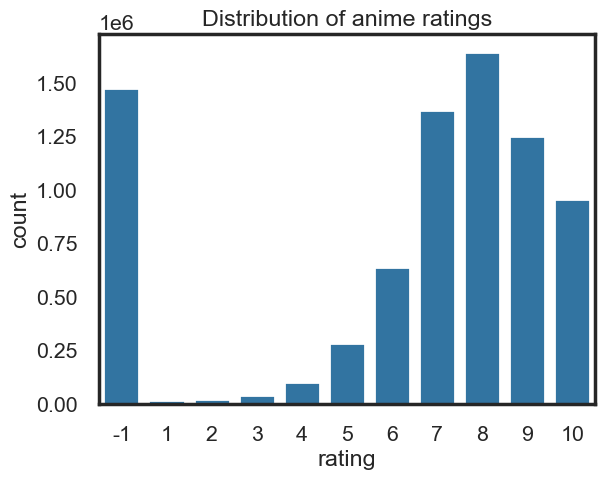

In [46]:
# Menampilkan distribusi rating
sns.countplot(x = 'rating', data = rating)
plt.title("Distribution of anime ratings")
plt.show()

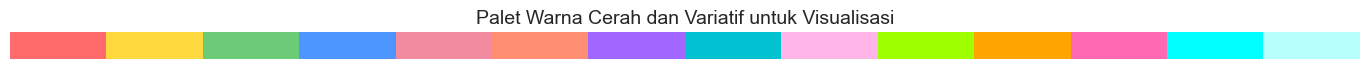

In [47]:
# Mengatur gaya visual
sns.set_style("white")
sns.set_context("poster", font_scale=0.7)

# Palet warna cerah dan bervariasi
palette = [
    "#FF6B6B", "#FFD93D", "#6BCB77", "#4D96FF", "#F38BA0",
    "#FF8E72", "#A066FF", "#00C2D1", "#FFB5E8", "#9DFF00",
    "#FFA500", "#FF69B4", "#00FFFF", "#B6FFFA"
]

# Menampilkan palet warna
sns.palplot(sns.color_palette(palette))
plt.title("Palet Warna Cerah dan Variatif untuk Visualisasi", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()

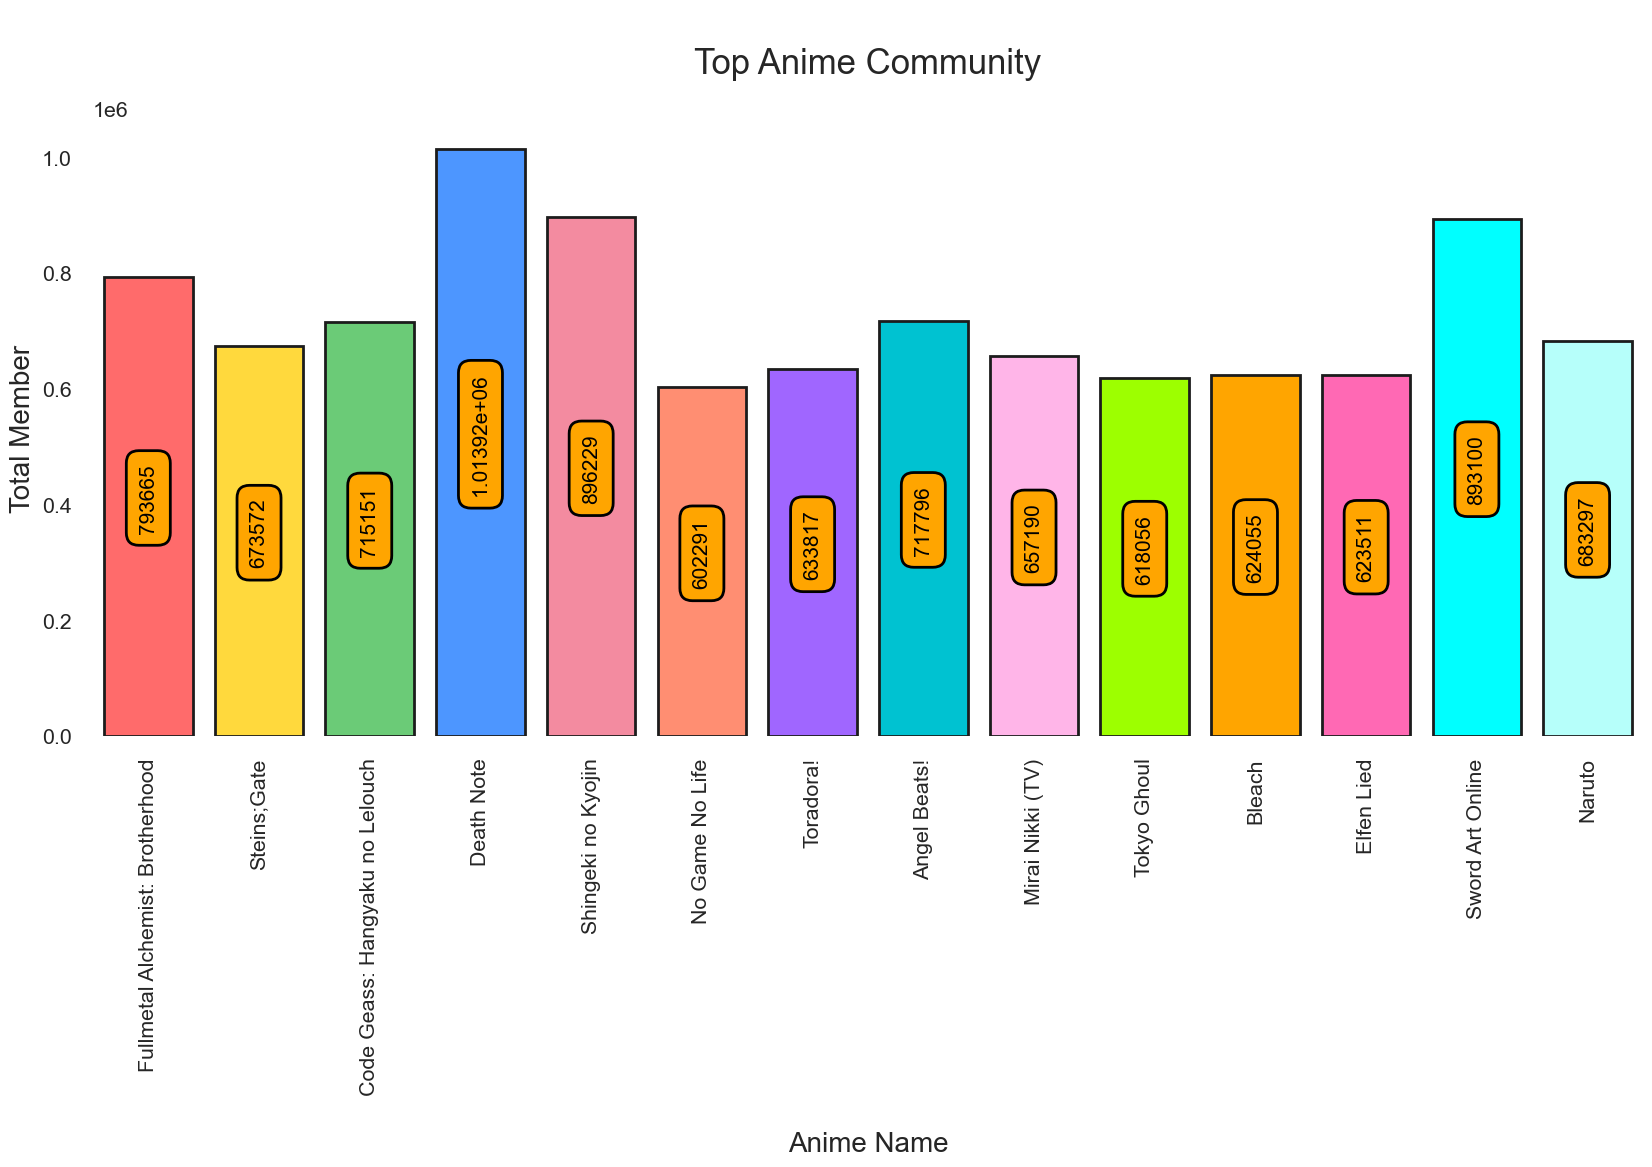

In [48]:
# Salin dataset anime dan hilangkan duplikat berdasarkan nama
top_anime = anime.copy()
top_anime.drop_duplicates(subset="name", keep="first", inplace=True)

# Urutkan anime berdasarkan jumlah anggota komunitas (members) dari yang terbanyak
top_anime_temp1 = top_anime.sort_values(["members"], ascending=False)

# Buat ukuran plot besar agar cukup untuk 14 judul anime
plt.subplots(figsize=(20, 8))

# Buat barplot menggunakan Seaborn
p = sns.barplot(
    x=top_anime_temp1["name"][:14],         # 14 anime teratas berdasarkan jumlah member
    y=top_anime_temp1["members"],
    palette=palette,                        # Menggunakan palet warna cerah yang sudah dibuat sebelumnya
    saturation=1,
    edgecolor="#1c1c1c",                    # Warna pinggir batang
    linewidth=2                             # Ketebalan garis pinggir
)

# Judul dan label sumbu
p.axes.set_title("\nTop Anime Community\n", fontsize=25)
plt.ylabel("Total Member", fontsize=20)
plt.xlabel("\nAnime Name", fontsize=20)

# Putar label nama anime agar tidak bertumpukan
plt.xticks(rotation=90)

# Tambahkan label di tengah batang (jumlah member)
for container in p.containers:
    p.bar_label(
        container,
        label_type="center",
        padding=6,
        size=15,
        color="black",
        rotation=90,
        bbox={                                     # Gaya kotak label
            "boxstyle": "round",
            "pad": 0.6,
            "facecolor": "orange",
            "edgecolor": "black",
            "alpha": 1
        }
    )

# Hilangkan garis sumbu bawah dan kiri untuk tampilan lebih bersih
sns.despine(left=True, bottom=True)

# Tampilkan plot
plt.show()

In [49]:
# Menampilkan kategori anime
print("Anime Categories :")

top_anime_temp1["type"].value_counts().to_frame().T

Anime Categories :


type,TV,OVA,Movie,Special,ONA,Music
count,3787,3311,2346,1676,659,488


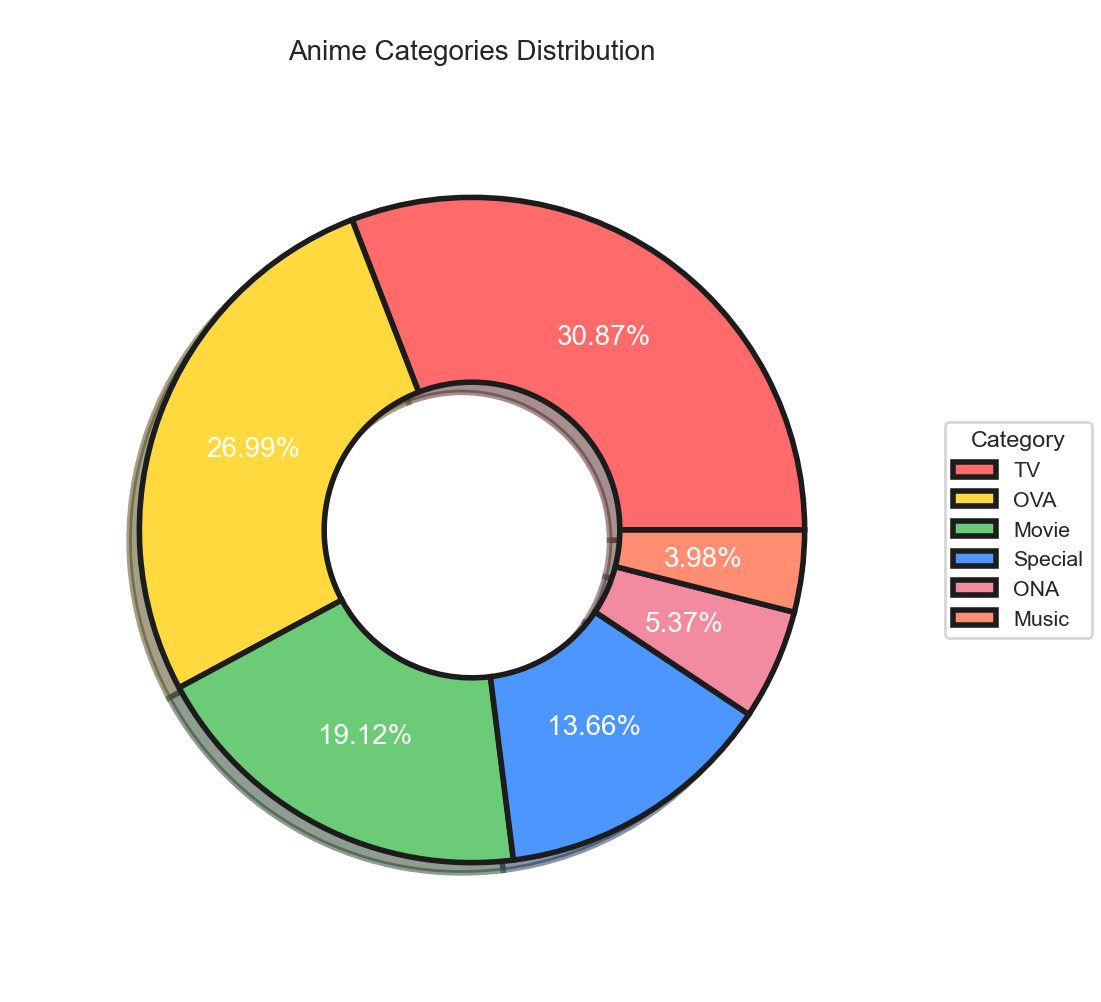

In [50]:
plt.subplots(figsize=(12, 12))

# Label kategori anime yang ingin ditampilkan
labels = ["TV", "OVA", "Movie", "Special", "ONA", "Music"]

# Proporsi masing-masing kategori dihitung berdasarkan jumlah anime
sizes = [len(top_anime_temp1[top_anime_temp1["type"] == cat]) for cat in labels]

size = 0.5  # Lebar cincin pie chart (donut chart)

# Membuat pie chart dengan warna dari palette dan styling teks putih
wedges, texts, autotexts = plt.pie(
    sizes,
    explode=(0, 0, 0, 0, 0, 0),
    textprops=dict(size=20, color="white"),
    autopct="%.2f%%",
    pctdistance=0.7,
    radius=0.9,
    colors=palette,
    shadow=True,
    wedgeprops=dict(width=size, edgecolor="#1c1c1c", linewidth=4),
    startangle=0,
)

# Menampilkan legenda di sebelah kiri grafik
plt.legend(wedges, labels, title="Category", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("\nAnime Categories Distribution", fontsize=20)
plt.show()

Mari kita lihat tampilan wordcloud genre anime 



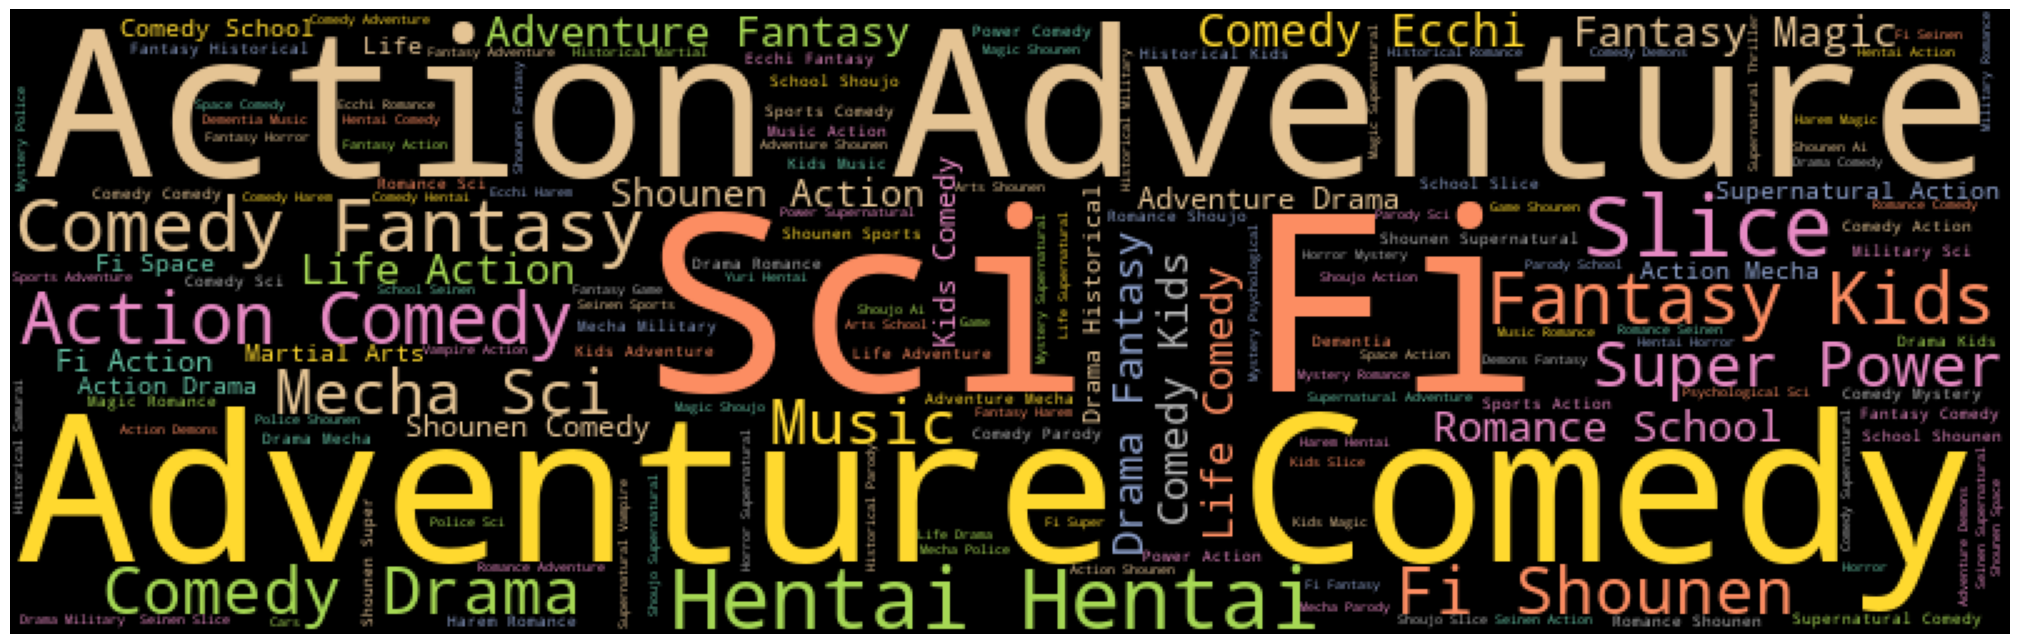

In [51]:
# Wordcloud warna-warni tapi elegan dengan colormap Set2
wordcloud = WordCloud(
    width=800, height=250,
    background_color="black",
    colormap="Set2",      # Warna-warni lembut dari matplotlib
    max_font_size=100,
    stopwords=None,
    repeat=True
).generate(top_anime["genre"].str.cat(sep=", | , | ,"))

print("Mari kita lihat tampilan wordcloud genre anime \n")

plt.figure(figsize=(20, 8), facecolor="white")  # Latar luar putih bersih
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad=0)
plt.show()

#Data Preparation

In [52]:
# Membersihkan missing value dengan fungsi dropna()
anime = anime.dropna()
# Mengecek kembali missing value pada variabel all_resto_clean
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

🧹 Menghapus Missing Values
Menghapus baris-baris yang hilangh dari dataset untuk memastikan bahwa data yang digunakan dalam pelatihan model bersih dan tidak bias.

In [53]:
#Menghapus data duplikat pada dataset rating
rating=rating.drop_duplicates()
rating.duplicated().sum()

np.int64(0)

🧹 Menghapus Data Duplikat
Menghapus baris-baris yang duplikat dari dataset untuk memastikan bahwa data yang digunakan dalam pelatihan model bersih dan tidak bias karena ada data yang sama.

In [54]:
# Menggabungkan dataset
fulldata = pd.merge(anime, rating, on="anime_id", suffixes=[None, "_user"])
fulldata = fulldata.rename(columns={"rating_user": "user_rating"})

print(f"Ukuran Dataset Gabungan : {fulldata.shape}")
print(f"\nSekilas Isi Dataset Gabungan :")

fulldata.head()

Ukuran Dataset Gabungan : (7813610, 9)

Sekilas Isi Dataset Gabungan :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [55]:
# Menyalin dataset ke variabel baru
data = fulldata.copy()

# Mengganti nilai -1 pada kolom 'user_rating' dengan NaN (nilai kosong)
data["user_rating"].replace(to_replace = -1, value = np.nan, inplace=True)

# Menghapus semua baris yang memiliki nilai kosong (NaN)
data = data.dropna(axis = 0)

# Menampilkan jumlah nilai kosong di setiap kolom setelah pra-pemrosesan
print("Jumlah nilai kosong setelah pra-pemrosesan akhir:")
data.isna().sum().to_frame()

Jumlah nilai kosong setelah pra-pemrosesan akhir:


,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0
user_id,0
user_rating,0


In [56]:
# Menghitung jumlah rating yang diberikan oleh setiap user
selected_users = data["user_id"].value_counts()

# Memfilter data hanya untuk user yang telah memberikan minimal 50 rating
data = data[data["user_id"].isin(selected_users[selected_users >= 50].index)]

In [57]:
# Membuat pivot table dari data
data_pivot_temp = data.pivot_table(index="name", columns="user_id", values="user_rating").fillna(0)

# Menampilkan 5 baris pertama dari pivot table
data_pivot_temp.head()

user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
import re

# Fungsi untuk membersihkan teks dari karakter-karakter khusus
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)        # Menghapus simbol &quot; (kutipan ganda HTML)
    text = re.sub(r'.hack//', '', text)       # Menghapus kata '.hack//' (mungkin dari judul anime)
    text = re.sub(r'&#039;', '', text)        # Menghapus simbol &#039; (apostrof HTML)
    text = re.sub(r'A&#039;s', '', text)      # Menghapus 'A's' (bisa jadi spesifik untuk judul tertentu)
    text = re.sub(r'I&#039;', 'I\'', text)    # Mengganti 'I's' menjadi 'I''
    text = re.sub(r'&amp;', 'and', text)      # Mengganti &amp; menjadi 'and'
    
    return text

# Menerapkan fungsi text_cleaning ke kolom 'name'
data["name"] = data["name"].apply(text_cleaning)

In [59]:
# Membuat pivot table baru setelah nama anime dibersihkan
data_pivot = data.pivot_table(index="name", columns="user_id", values="user_rating").fillna(0)

# Menampilkan informasi
print("Setelah membersihkan nama-nama anime, mari kita lihat tampilannya:")

# Menampilkan 5 baris pertama dari pivot table
data_pivot.head()

Setelah membersihkan nama-nama anime, mari kita lihat tampilannya:


user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1: RandB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Collaborative Filtering

In [60]:
# Mengubah data pivot menjadi bentuk matriks sparse (efisien untuk komputasi)
data_matrix = csr_matrix(data_pivot.values)

# Membuat model KNN dengan metrik cosine similarity dan brute-force search
model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(data_matrix)

# Memilih satu anime secara acak sebagai query
query_no = np.random.choice(data_pivot.shape[0])
print(f"Kita akan mencari rekomendasi untuk anime ke-{query_no}, yaitu \"{data_pivot.index[query_no]}\".")

# Mencari 6 anime terdekat (termasuk dirinya sendiri) berdasarkan cosine similarity
distances, indices = model_knn.kneighbors(
    data_pivot.iloc[query_no, :].values.reshape(1, -1), 
    n_neighbors=6
)

Kita akan mencari rekomendasi untuk anime ke-3977, yaitu "K: Return of Kings".


In [61]:
no = []         # Menyimpan nomor urutan
name = []       # Menyimpan nama anime
distance = []   # Menyimpan jarak (kemiripan) dari anime query
rating = []     # Menyimpan rating dari anime

for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Rekomendasi untuk penonton anime \"{data_pivot.index[query_no]}\" :\n")
    else:
        # Menambahkan data ke list kecuali anime itu sendiri (i == 0)
        no.append(i)
        name.append(data_pivot.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        
        # Mengambil rating dari DataFrame anime berdasarkan nama
        rating.append(*anime[anime["name"] == data_pivot.index[indices.flatten()[i]]]["rating"].values)

# Membuat DataFrame rekomendasi
dic = {"No" : no, "Anime Name" : name, "Rating" : rating}
recommendation = pd.DataFrame(data = dic)
recommendation.set_index("No", inplace = True)


recommendation

Rekomendasi untuk penonton anime "K: Return of Kings" :



,Anime Name,Rating
No,,
1,K: Missing Kings,7.94
2,K,7.73
3,Owari no Seraph: Nagoya Kessen-hen,7.84
4,Noragami Aragoto,8.48
5,Owari no Seraph,7.65


#Content Based Filtering

In [62]:
# Membuat objek TF-IDF vectorizer untuk teks genre
tfv = TfidfVectorizer(
    min_df=3,                     # Hanya mempertimbangkan kata/fitur yang muncul di minimal 3 dokumen
    max_features=None,            # Tidak membatasi jumlah maksimum fitur
    strip_accents="unicode",      # Menghapus aksen dari karakter
    analyzer="word",              # Menganalisis per kata
    token_pattern=r"\w{1,}",      # Pola tokenisasi (kata minimal 1 huruf)
    ngram_range=(1, 3),           # Menggunakan unigram, bigram, dan trigram
    stop_words="english"          # Menghapus stopwords bahasa Inggris
)
# Menyalin data dan menghapus duplikat berdasarkan nama anime
rec_data = fulldata.copy()
rec_data.drop_duplicates(subset="name", keep="first", inplace=True)
rec_data.reset_index(drop=True, inplace=True)

# Memproses kolom genre menjadi bentuk string yang bisa dianalisis
genres = rec_data["genre"].str.split(", | , | ,").astype(str)

# Membuat TF-IDF matrix dari data genre
tfv_matrix = tfv.fit_transform(genres)

In [63]:
# Menghitung kemiripan antar anime berdasarkan genre menggunakan sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

# Membuat Series: key = nama anime, value = index
rec_indices = pd.Series(rec_data.index, index=rec_data["name"]).drop_duplicates()

def give_recommendation(title, sig=sig):
    idx = rec_indices[title]  # Mengambil indeks dari anime berdasarkan judul

    sig_score = list(enumerate(sig[idx]))  # Skor kemiripan antar semua anime
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)  # Urutkan dari paling mirip
    sig_score = sig_score[1:11]  # Ambil 10 anime mirip (kecuali dirinya sendiri)

    anime_indices = [i[0] for i in sig_score]  # Ambil indeks dari anime hasil rekomendasi

    # Buat DataFrame rekomendasi
    rec_dic = {
        "No": range(1, 11),
        "Anime Name": anime["name"].iloc[anime_indices].values,
        "Rating": anime["rating"].iloc[anime_indices].values
    }
    dataframe = pd.DataFrame(data=rec_dic)
    dataframe.set_index("No", inplace=True)

    print(f"Rekomendasi untuk penonton \"{title}\" :\n")

    return dataframe



In [64]:
give_recommendation("Bleach")

Rekomendasi untuk penonton "Bleach" :



,Anime Name,Rating
No,,
1,Detective Conan Movie 19: The Hellfire Sunflowers,7.77
2,Persona 4 the Animation,7.68
3,Shelter,8.38
4,Hotori: Tada Saiwai wo Koinegau,7.14
5,Chibi☆Devi!,6.86
6,Oyayubi Hime Monogatari,6.85
7,Taimadou Gakuen 35 Shiken Shoutai,7.05
8,Shikabane Hime: Kuro Special,7.12
9,Choujin Locke,6.65


In [65]:
give_recommendation("Choujin Locke")

Rekomendasi untuk penonton "Choujin Locke" :



,Anime Name,Rating
No,,
1,Hai to Gensou no Grimgar,7.87
2,The Big O,7.57
3,Baka to Test to Shoukanjuu: Spinout! Sore ga B...,7.40
4,Saber Marionette J to X,7.39
5,Daisuki! BuBu ChaCha,7.26
6,Wonder Beat Scramble,6.92
7,Wanwan Sanjuushi,6.78
8,Shigofumi Picture Drama,6.75
9,Ginga Tetsudou 999: Jikuu wo Koeta Energy no Tabi,6.67
